In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Spherical, IndicatorOridinaryKrigging
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
p1 = Dot(x=50,y=40, fields={'facies':'sand'})
p2 = Dot(x=20,y=90, fields={'facies':'coal'})
p3 = Dot(x=60,y=70, fields={'facies':'shale'})
p = CloudPoints(points = [p1,p2,p3])
#p.one_hot_encode('facies')
print(p.df())

      x     y     z   crs facies
0  50.0  40.0  None  None   sand
1  20.0  90.0  None  None   coal
2  60.0  70.0  None  None  shale


In [4]:
up1 = Dot(x=70,y=27)
up = CloudPoints(points = [up1])
up.df()

,x,y,z,crs
0,70.0,27.0,None,None


<AxesSubplot:>

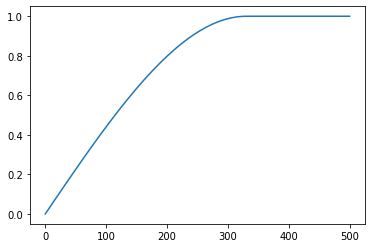

In [5]:
s1 = Spherical(
    sill = 1.,
    range = 330,
    nuggets = 0.
)

s1.plot(np.linspace(0,500,50))

In [6]:
p.df()

,x,y,z,crs,facies
0,50.0,40.0,None,None,sand
1,20.0,90.0,None,None,coal
2,60.0,70.0,None,None,shale


In [7]:
ik = IndicatorOridinaryKrigging(
    known_cp = p,
    unknown_cp = up,
    variogram_model = s1
)
ik

IndicatorOridinaryKrigging(known_cp=CloudPoints(points=[Dot(x=50.0, y=40.0, z=None, crs=None, fields={'facies': 'sand'}), Dot(x=20.0, y=90.0, z=None, crs=None, fields={'facies': 'coal'}), Dot(x=60.0, y=70.0, z=None, crs=None, fields={'facies': 'shale'})]), unknown_cp=CloudPoints(points=[Dot(x=70.0, y=27.0, z=None, crs=None, fields=None)]), variogram_model=Spherical(sill=1.0, nugget=0.0, range=330.0))

<AxesSubplot:>

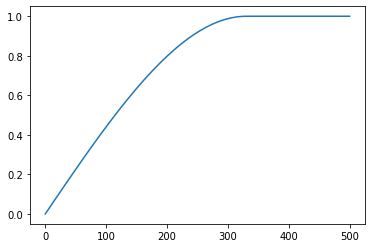

In [8]:
ik.variogram_model.plot(np.linspace(0,500,50))

In [9]:
rcp = ik.forward('facies')
rcp.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               1 non-null      float64
 1   y               1 non-null      float64
 2   z               0 non-null      object 
 3   crs             0 non-null      object 
 4   sand            1 non-null      float64
 5   sand_variance   1 non-null      float64
 6   coal            1 non-null      float64
 7   coal_variance   1 non-null      float64
 8   shale           1 non-null      float64
 9   shale_variance  1 non-null      float64
 10  facies          1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 216.0+ bytes


In [10]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df['Facies'] = df['Facies'].map({0:'sand',1:'shale'})
df

,X,Y,Facies,Porosity,Perm
0,100,900,shale,0.115359,5.736104
1,100,800,shale,0.136425,17.211462
2,100,600,shale,0.135810,43.724752
3,100,500,sand,0.094414,1.609942
4,100,100,sand,0.113049,10.886001
...,...,...,...,...,...
284,190,199,shale,0.109411,3.247265
285,190,419,sand,0.099541,1.528003
286,920,379,sand,0.094099,2.514597
287,60,149,sand,0.100167,3.636854


In [11]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,shale,0.115359,5.736104
1,100.0,800.0,None,None,shale,0.136425,17.211462
2,100.0,600.0,None,None,shale,0.135810,43.724752
3,100.0,500.0,None,None,sand,0.094414,1.609942
4,100.0,100.0,None,None,sand,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,shale,0.109411,3.247265
285,190.0,419.0,None,None,sand,0.099541,1.528003
286,920.0,379.0,None,None,sand,0.094099,2.514597
287,60.0,149.0,None,None,sand,0.100167,3.636854


<AxesSubplot:xlabel='x', ylabel='y'>

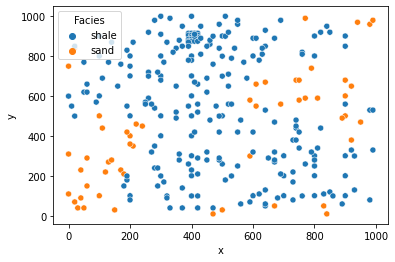

In [12]:
cp.plot(hue='Facies')

<AxesSubplot:>

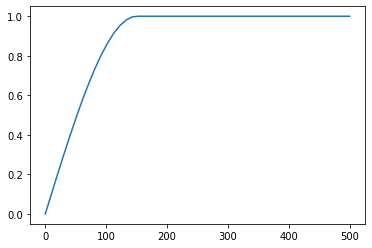

In [13]:
s2 = Spherical(
    sill = 1.,
    range = 150,
    nuggets = 0.
)

s2.plot(np.linspace(0,500,50))

In [14]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
grid = CloudPoints().from_df(dfun, x='x',y='y')

In [15]:
ik2 = IndicatorOridinaryKrigging(
    known_cp = cp,
    unknown_cp = grid,
    variogram_model = s2
)


In [20]:
rcp2 = ik2.forward('Facies', argmax=True)
rcp2.df()

,x,y,z,crs,shale,shale_variance,sand,sand_variance,Facies
0,0.0,0.000000,None,None,0.428006,0.706652,0.571994,0.706652,sand
1,0.0,20.408163,None,None,0.309545,0.550432,0.690455,0.550432,sand
2,0.0,40.816327,None,None,0.197713,0.422455,0.802287,0.422455,sand
3,0.0,61.224490,None,None,0.120137,0.330105,0.879863,0.330105,sand
4,0.0,81.632653,None,None,0.070710,0.279478,0.929290,0.279478,sand
...,...,...,...,...,...,...,...,...,...
2495,1000.0,918.367347,None,None,0.375504,0.677546,0.624496,0.677546,sand
2496,1000.0,938.775510,None,None,0.229328,0.473992,0.770672,0.473992,sand
2497,1000.0,959.183673,None,None,0.114166,0.288207,0.885834,0.288207,sand
2498,1000.0,979.591837,None,None,0.083206,0.186104,0.916794,0.186104,sand


<AxesSubplot:xlabel='x', ylabel='y'>

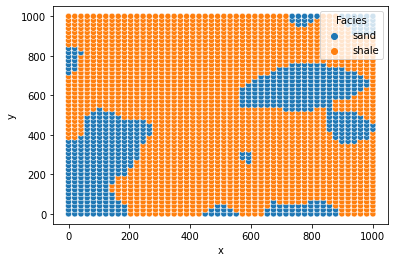

In [21]:
rcp2.plot(hue='Facies')

<AxesSubplot:xlabel='x', ylabel='y'>

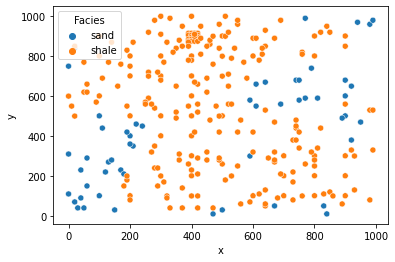

In [19]:
cp.plot(hue='Facies', hue_order=['sand','shale'])

In [ ]:
dft = rcp2.df()
dft

In [ ]:
from numpy.random import default_rng

rng = default_rng(seed=None)

rng.choice(dft['Facies'].unique(), size=10)


In [ ]:
for i, r in dft.head().iterrows():
    print(r[['sand','shale']])

In [ ]:
def softmax(x):
    e = np.exp(x)
    return e / e.sum()

In [ ]:
softmax([-0.2,0.2,0.6,0.4])